In [102]:
#import needed packages
import numpy as np; import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import math
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp, odeint
from scipy import stats
import seaborn as sns
import ternary

## Chapter 3

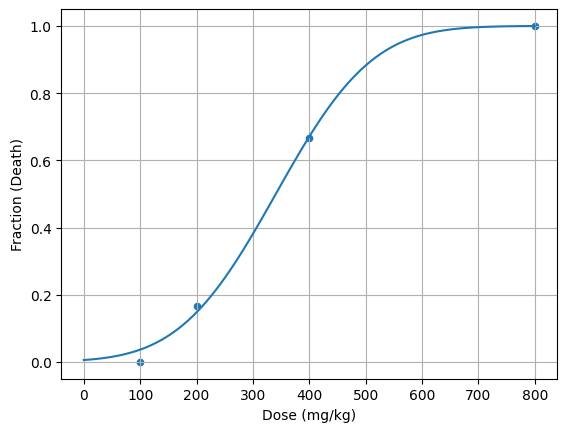

In [2]:
#create a dataframe with the data
df = pd.DataFrame([100,200,400,800], columns=['Dose (mg/kg)'])
df['Fraction (Death)'] = [0/6,1/6,4/6,6/6]
#set function for fitting with curve_fit
def cumulative_gaussian(x, mu, sigma):
    return norm.cdf(x, mu, sigma)
# fit a cumulative gaussian to the data
popt, pcov = curve_fit(cumulative_gaussian, df['Dose (mg/kg)'], df['Fraction (Death)'],p0=[350, 100])

x = np.linspace(0, 800, 100)
y = cumulative_gaussian(x, *popt)
#plot the data and the fit
df.plot(x='Dose (mg/kg)', y='Fraction (Death)', kind='scatter')
plt.plot(x, y, label='fit'); plt.grid()
plt.show()

In [3]:
def probit(x):
    return norm.ppf(x) + 5

In [4]:
import math

In [5]:
def back(x):
    return 0.50*(1+(x-5)/(abs(x-5))*math.erf(abs(x-5)/math.sqrt(2)))

In [6]:
back(probit(0.32))

0.32000000000000006

In [7]:
#Heat flux plot with DOD 6055
data = {'Heat Flux (kW/m2)':[1,2,3,4,5,6,8,10,12], 
        'Pain time (sec)':[115,45,27,18,13,11,7,5,4], 
        '2nd Degree Time (sec)':[663, 187,92,57,40,30,20,14,11]}
df = pd.DataFrame(data)

In [8]:

#Causitive variable from Probit correlations from death from burning
time = np.linspace(5, 700, 1000)
def Q2(t):
    return (t/200)**(-1/1.46)

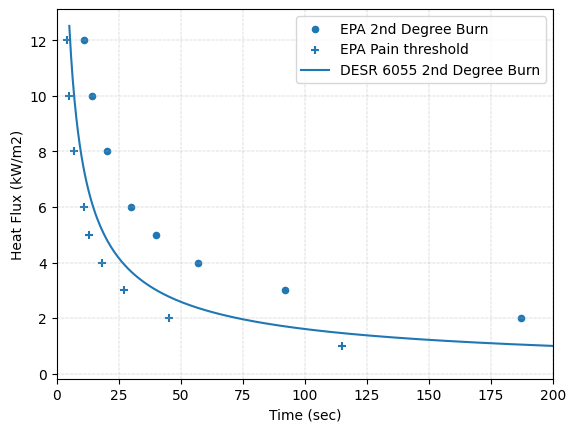

In [9]:
df.plot(x='2nd Degree Time (sec)', y='Heat Flux (kW/m2)', kind = 'scatter', label='EPA 2nd Degree Burn')
plt.scatter(df['Pain time (sec)'], df['Heat Flux (kW/m2)'], marker = '+', label = 'EPA Pain threshold')
plt.xlim([0,200])
plt.plot(time, Q2(time), label = 'DESR 6055 2nd Degree Burn')
plt.xlabel('Time (sec)')
plt.grid(linestyle='-.', linewidth=0.3)
plt.legend()

## Chapter 4

In [10]:
math.factorial(3)

6

In [11]:
def PoissonPMF(k,l,t):
    return (l*t)**k*np.exp(-l*t)/math.factorial(k)

In [12]:
lamb = 1e-6 #1 event per 1e-6 hours
tim = 8760*100
PoissonPMF(1,lamb,tim)


0.3648061406338529

In [13]:
1-np.exp(-lamb*tim)

0.5835546339796199

In [14]:
lamb*tim

0.876

# Chapter 6

In [15]:
#Problem with standard gibbs energy of reaction
#Properties
#hydrogen
Cp_h = 29 #J/mol/K
DS_h = 130 #J/mol/K
#carbon
Cp_c = 16 #J/mol/K
DS_c = 5.7 #J/mol/K
#methane
Cp_m = 52 #J/mol/K
DS_m = 186 #J/mol/K
DH_m = -74.8 #kJ/mol
#nitrogen
Cp_n = 29 #J/mol/K
DS_n = 191 #J/mol/K
#ammonia
Cp_a = 48 #J/mol/K
DS_a = 193 #J/mol/K
DH_a = -45.9 #kJ/mol

In [16]:
def H(T):
    return (2*Cp_h + Cp_c)*(T-298)-  (DH_m*1000+ Cp_m*(T-298))
def S(T):
    return (2*Cp_h + Cp_c)*np.log(T/298) + 2*DS_h + DS_c - (DS_m + Cp_m*np.log(T/298))
def G(T):
    return H(T) - T*S(T)

In [17]:
Tdecomp = fsolve(G,800)
Tdecomp[0]

846.0931031393527

In [18]:
G(Tdecomp[0])

-2.9103830456733704e-11

In [19]:
Tdecomp[0]-273

573.0931031393527

In [20]:
850-273

577

In [21]:
def Ha(T):
    return 2*(DH_a*1000+ Cp_a*(T-298))-(3*Cp_h + Cp_n)*(T-298)  
def Si(T,P,DS,Cp):
    return DS + Cp*np.log(T/298) - 8.314*np.log(P/1)  #DS in J/mol/K, Cp in J/mol/K, P in atm
def Sa(T,P):
    return 2*Si(T,P,DS_a,Cp_a) - (3*Si(T,P,DS_h,Cp_h) + Si(T,P,DS_n,Cp_n))
def Ga(T,P):
    return (Ha(T) - T*Sa(T,P))/2 # per mole of ammonia 

In [22]:
Ga(300,1)

-16649.933035547612

In [23]:
#determine the points at various pressures and temperatures where the Gibbs energy is zero
#for a given temperature, find the pressure where the Gibbs energy is zero
def find_pressure(T):
    def func(P):
        return Ga(T, P)
    P_guess = 0.002  # initial guess for pressure
    P_solution = fsolve(func, P_guess)
    return P_solution[0]
# for a range of temperatures, find the pressures where the Gibbs energy is zero
temperatures = np.linspace(300, 849, 100)  # temperature range in Kelvin
pressures = [find_pressure(T) for T in temperatures]

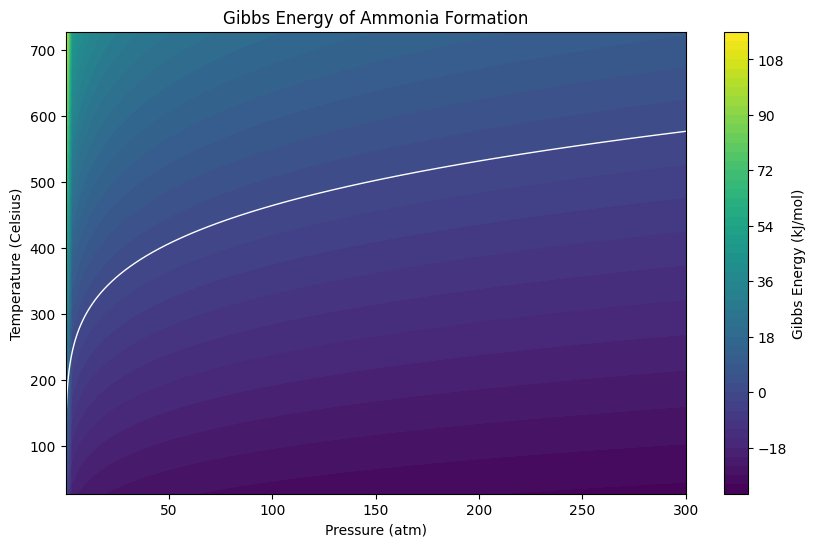

In [24]:
#generate a contour plot of the Gibbs energy of ammonia formation
import matplotlib.pyplot as plt
import numpy as np
T = np.linspace(300, 1000, 100)  # Temperature range in Kelvin
P = np.linspace(0.001, 300, 100)  # Pressure range in atm
G = np.zeros((len(T), len(P)))
for i, t in enumerate(T):
    for j, p in enumerate(P):
        G[i, j] = Ga(t, p)/1000  # Gibbs energy in kJ/mol
plt.figure(figsize=(10, 6))
plt.contourf(P, T-273, G, levels=50, cmap='viridis')
#add white line for zero Gibbs energy using temperatures and pressures arrays
plt.plot(pressures, temperatures-273, color='white', linewidth=1, label='Zero Gibbs Energy')
plt.colorbar(label='Gibbs Energy (kJ/mol)')
plt.xlabel('Pressure (atm)')
plt.ylabel('Temperature (Celsius)')
plt.title('Gibbs Energy of Ammonia Formation')
plt.show()

In [25]:
#time to dissipate charge

# Q = Qo*np.exp(-t/tau))
def Q(t, Qo, tau):
    return Qo * np.exp(-t / tau)

Q(100, 1, 0.1)

0.0

In [26]:
# Arrhenius equation rate increase
def arrhenius(T, A, Ea):
    R = 8.314  # J/(mol*K)
    return A * np.exp(-Ea / (R * T))

In [27]:
arrhenius(350, 1e10, 60e3)/arrhenius(300, 1e10, 60e3)

31.079368636161025

## Octane Vapor Pressure/ Vapor Fraction

In [28]:
Ao = 4.04867; Bo = 1355.126; Co = -63.633
#Antoine constants from https://webbook.nist.gov/cgi/cbook.cgi?ID=C111659&Mask=4&Type=ANTOINE&Plot=on
def Po(T): #pressure in bar
    return 10**(Ao - Bo/(T+273.15 + Co))

In [29]:
def fo(T): #fraction of octane
    return Po(T)/1 

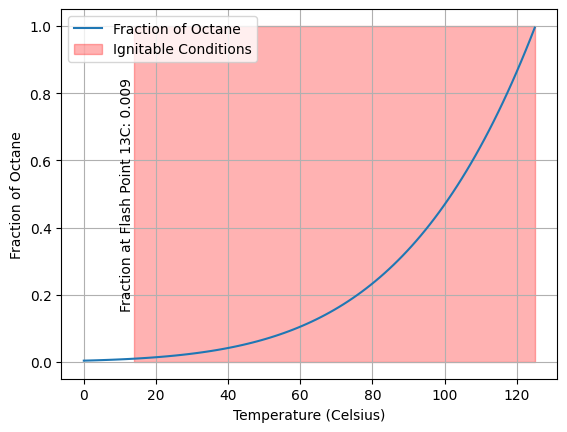

In [30]:
#plot the fraction of octane as a function of temperature
T = np.linspace(0, 125, 100)
plt.plot(T, fo(T), label='Fraction of Octane')
#show a semitransparent red box above 13 degrees Celsius
plt.fill_between(T, 1, where=(T > 13), color='red', alpha=0.3, label='Ignitable Conditions')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Fraction of Octane')
#add label of fraction at 13 degrees Celsius with the text rotated to be vertical
plt.text(10, 0.5, f'Fraction at Flash Point 13C: {fo(13):.3f}', fontsize=10, verticalalignment='center', rotation=90)
#plt.title('Fraction of Octane vs Temperature')
plt.grid(); 
plt.legend()
plt.show()

In [31]:
#Flash point prediction for octanol from K. Satyanarayana and P.G. Rao, "Improved equation to estimate flash points of organic compounds," 
def flash_point(Tb,a,b,c):
    E1 = a + b*Tb+c/Tb**2
    E2 = a + b*((c/Tb)**2)*(np.exp(-c/Tb))/((1-np.exp(-c/Tb))**2)
    return E2

In [32]:
flash_point(125+273,225.1,537.6,2217)-273

16.12747359546364

In [33]:
1/(0.01/10+0.0/100)

1000.0

In [34]:
3.5*1.65

5.7749999999999995

In [35]:
0.15*2.5

0.375

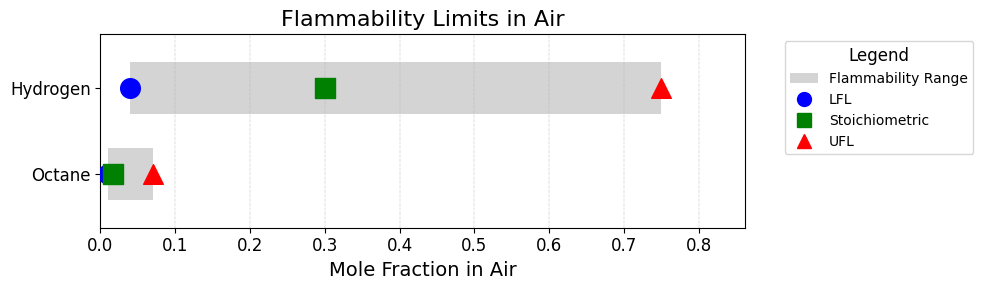

In [36]:
data = {'Chemical':['Octane','Octane','Octane','Hydrogen','Hydrogen','Hydrogen'],
        'Type':['LFL','Stoichiometric','UFL','LFL','Stoichiometric','UFL'],
        'Composition':[0.01,0.0165,0.07,0.04,0.30,0.75]}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 3)) # Keep the refined figure height
ax = plt.gca()

# Get unique chemicals and their y-axis positions
chemicals = df['Chemical'].unique()
y_positions = {chem: i for i, chem in enumerate(chemicals)}

# Pivot the DataFrame to easily access LFL, Stoichiometric, UFL for each chemical
df_pivoted = df.pivot_table(index='Chemical', columns='Type', values='Composition')

# --- Add the grey bar representing the highlighted region between LFL and UFL ---
# This bar will be plotted first (lower zorder) so points appear on top
highlight_bar_handle = None # To store handle for legend

for i, chemical in enumerate(chemicals):
    lfl_val = df_pivoted.loc[chemical, 'LFL']
    ufl_val = df_pivoted.loc[chemical, 'UFL']

    bar_width = ufl_val - lfl_val
    bar = ax.barh(y_positions[chemical], bar_width, left=lfl_val,
                  height=0.6, color='lightgray', alpha=0.96, zorder=1) # zorder=1 to be behind points
    if highlight_bar_handle is None: # Capture handle for legend once
        highlight_bar_handle = bar


# --- Plot the individual points for LFL, Stoichiometric, and UFL ---
# Define specific marker/color for each type for the legend
point_styles = {
    'LFL': {'marker': 'o', 'color': 'blue', 'label': 'LFL'},
    'Stoichiometric': {'marker': 's', 'color': 'green', 'label': 'Stoichiometric'},
    'UFL': {'marker': '^', 'color': 'red', 'label': 'UFL'}
}
point_size = 200 # Larger marker size for scatter points

# Collect legend handles for points
point_legend_handles = {}

for chemical_idx, chemical in enumerate(chemicals):
    for point_type, style in point_styles.items():
        composition_value = df_pivoted.loc[chemical, point_type]

        # Plot the point (on top of the bar)
        scatter_plot = ax.scatter(composition_value, y_positions[chemical],
                                  marker=style['marker'], color=style['color'],
                                  s=point_size, zorder=3) # zorder=3 to be on top of bars

        # Store handle for legend if not already added
        if point_type not in point_legend_handles:
            # Use Line2D for scatter point legend entry
            point_legend_handles[point_type] = plt.Line2D([0], [0],
                                                          marker=style['marker'],
                                                          color=style['color'],
                                                          markersize=10, # Adjusted for legend size
                                                          linestyle='None',
                                                          label=style['label'])

# Set y-axis ticks and labels (reusing previous settings)
plt.yticks(list(y_positions.values()), list(y_positions.keys()), fontsize=12)

# Set x-axis limit
max_composition = df['Composition'].max() # Use overall max composition
plt.xlim(0, max_composition * 1.15) # Buffer for clarity

# Set labels and title with larger fonts
plt.xlabel('Mole Fraction in Air', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Flammability Limits in Air', fontsize=16)

# Add grid lines
plt.grid(linestyle='-.', linewidth=0.3, axis='x')

# Adjust tick label font sizes
plt.tick_params(axis='x', labelsize=12)

# Add margins to the y-axis (as previously refined)
plt.margins(y=0.2)

# --- Create the combined legend ---
# Ensure the 'Flammability Range' comes first, then LFL, Stoichiometric, UFL
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc="lightgray", alpha=0.96, label="Flammability Range") # Entry for the grey bar
]
# Add entries for LFL, Stoichiometric, UFL points in desired order
for key in ['LFL', 'Stoichiometric', 'UFL']:
    if key in point_legend_handles:
        legend_elements.append(point_legend_handles[key])


plt.legend(handles=legend_elements, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

In [37]:
Ox = (1-0.07)*0.21; Cst = 1.11
LOC = (1+Cst*7)/(1+Cst)*(Ox/0.07)
LOC

11.596350710900468

UOL in pure oxygen: 94.03%


/Users/clintguymon/opt/anaconda3/envs/jupiterbook/lib/python3.9/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


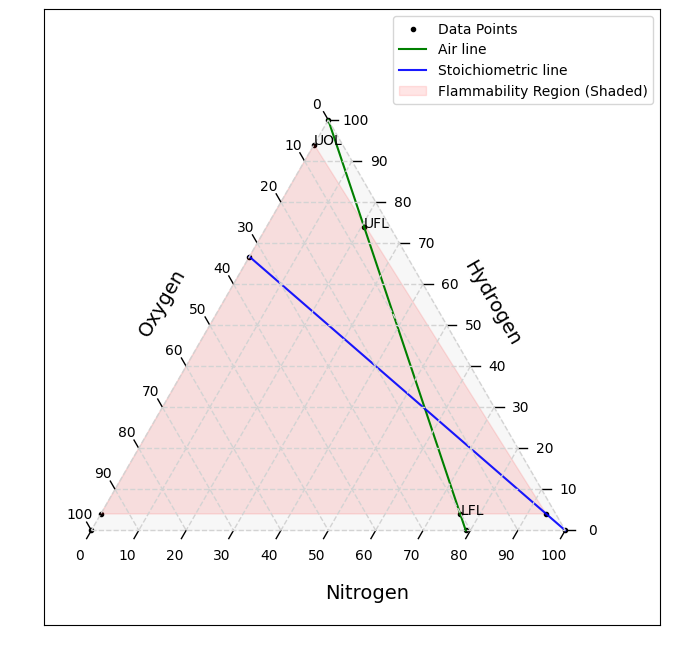

In [38]:
ufl = 74
lfl = 4
stoic = 66.7 #stoichiometric ratio for hydrogen in oxygen
loc = 2

def flammabilityTriangle(name,lfl, ufl, stoic,loc,figsize = (10, 8)):
    # The stoic value is the stoichiometric ratio of fuel in pure oxygen
    lfl_o = (100-lfl)*0.21; ufl_o = (100-ufl)*0.21
    lfl_n = 100 - lfl - lfl_o; ufl_n = 100 - ufl - ufl_o
    slope = 1/(100/stoic-1) # z/y or ratio of fuel to oxygen at stoichiometric mixture
    def eq(vars):
        x, y = vars #x is n2, y is o2
        denom = x+y*(1+slope)
        eq1 = loc/100 - y/(denom)
        eq2 = loc/100 + x/denom + y*slope/denom - 1
        return eq1, eq2
    mol_n2, mol_o2 = fsolve(eq, (0.5, 0.5)); mol_f = slope*mol_o2
    loc_f = mol_f/(mol_n2+mol_o2+mol_f)*100
    uol = ufl*(100+1.87*(100-ufl_o))/(ufl_o+ufl*(1+1.87)) #upper flammability limit in pure oxygen
    print(f"UOL in pure oxygen: {uol:.2f}%")
    lol = lfl
    data = [
         #nitrogen fuel oxygen
        [0, 0, 100],  # Pure Oxygen 0
        [79, 0, 21],  # Pure Air 1
        [0, 100, 0],  # Pure Fuel 2
        [100,0,0],    # pure n2  3
        [lfl_n, lfl, lfl_o],  #LFL  4
        [ufl_n,ufl,ufl_o],    #UFL  5
        [0,uol,100-uol], #upper loc 6 (uol)
        [0,stoic,100-stoic], #left most stoic point  7
        [100-loc-loc_f, loc_f,loc],#intersection  8 (actual loc at stoichiometric point)
        [0,lol,100-lol], #lol 9
        # Add more data points as needed
    ]
    # Create a larger figure
    whole = plt.figure(figsize=figsize)
    box = whole.subplots()
    # Create a ternary plot
    fig, tax = ternary.figure(ax = box, scale=100)
    #fix what terniary messes up
    box.set_ylim(-20,110)
    box.set_xlim(-10,120)
    box.set_aspect(1)
    box.tick_params(axis='both', which='both', length=0,labelcolor = 'white') #if you can't beat them join them

    tax.ticks(axis='lbr', linewidth=1, multiple=10, offset=0.02, clockwise=False)
    # Plot data points
    tax.scatter(data, marker='.', color='k', label='Data Points')

    # Add a line between pure fuel and pure air
    tax.line(data[2], data[1], color='green', linestyle='-',label = "Air line")
    #tax.line(data[9], data[8], color='red', alpha=0.6, linestyle='--', label = "Flammability region")
    tax.line(data[3], data[7], color='blue', alpha=0.9, linestyle='-', label = "Stoichiometric line")
    #tax.line(data[6], data[8], color='red', alpha=0.6, linestyle='--')

    # --- Corrected part for shading (hopefully for good this time!) ---
    # Define the vertices of the flammability region in ternary coordinates
    flammability_vertices_ternary = [data[9], data[8], data[6]]

    # Convert ternary coordinates to Cartesian (x, y) coordinates for matplotlib's fill
    flammability_vertices_cartesian = ternary.helpers.project_sequence(flammability_vertices_ternary)

    # Use the underlying matplotlib axes (box) to fill the region
    box.fill(
        flammability_vertices_cartesian[0], # X coordinates
        flammability_vertices_cartesian[1], # Y coordinates
        color='red',
        alpha=0.1,
        label="Flammability Region (Shaded)"
    )
    # --- End of corrected part ---

    # Customize the plot
    #tax.set_title(f"Flammability Triangle for {name} in Air", fontsize=16)
    tax.left_axis_label("Oxygen", fontsize=14, offset=0.1)
    tax.right_axis_label(name, fontsize=14, offset=0.02)
    tax.bottom_axis_label("Nitrogen", fontsize=14, offset=-.1)
    tax.gridlines(color="lightgrey", multiple=10, linewidth=1, linestyle='--')

    # Define labels for data points
    labels = ["", "", "","","LFL","UFL","UOL","","",""]

    # Add labels for data points
    for i, point in enumerate(data):
        tax.annotate(labels[i], position=point, fontsize=10)

    # Add legend
    tax.legend()

    # Show the plot
    plt.ticks = False
    plt.show()

flammabilityTriangle("Hydrogen", lfl,ufl,stoic,loc)

UOL in pure oxygen: 44.25%


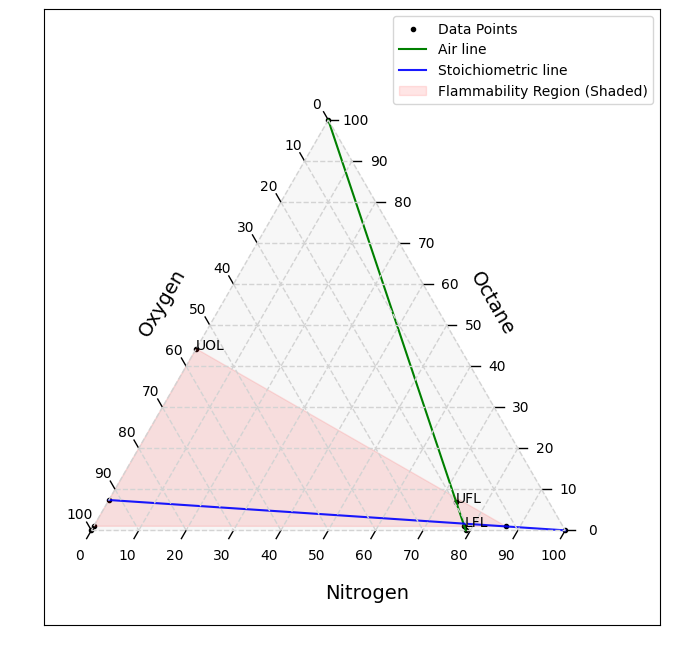

In [39]:
flammabilityTriangle("Octane", lfl=1,ufl=7,stoic=7.4,loc=12)

## Kst plot

In [40]:
# plot of the pressure versus time for a hydrogen gas explosion
df = pd.read_csv('hydrogen_explosion_data.csv')

In [41]:
df

,Time_ms,Pressure_psig
0,0.0000,0.000000
1,0.0252,0.000056
2,0.0504,0.000224
3,0.0756,0.000504
4,0.1008,0.000896
...,...,...
2995,75.4740,73.824251
2996,75.4992,73.817988
2997,75.5244,73.811726
2998,75.5496,73.805465


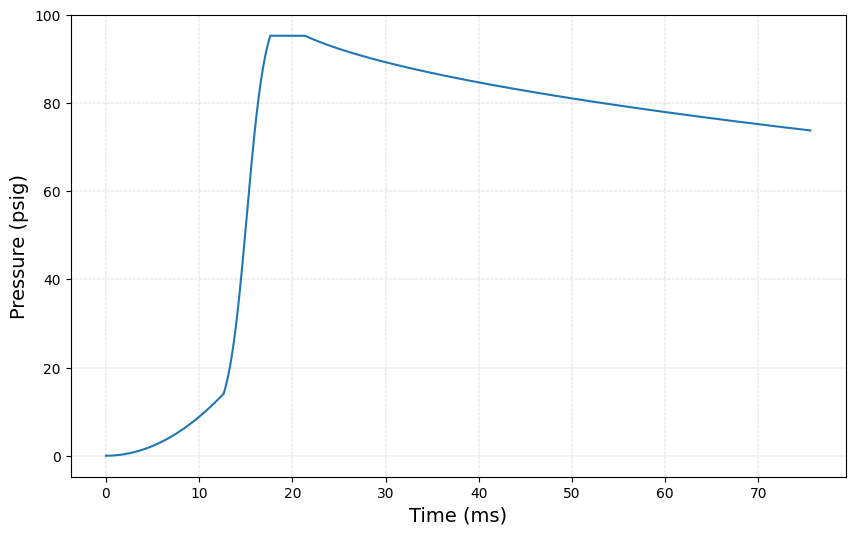

In [42]:
#plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Time_ms'], df['Pressure_psig'])
#plt.plot(df['Time_ms'], df['dP_dt'], label='dP/dt', color='orange')
#plt.title('Pressure vs Time for Hydrogen Gas Explosion', fontsize=16)
plt.xlabel('Time (ms)', fontsize=14)
plt.ylabel('Pressure (psig)', fontsize=14)
plt.grid(linestyle='-.', linewidth=0.3)
plt.show()

In [43]:
#calculate the Kst value
#First calculate the derivative of pressure with respect to time
df['dP_dt'] = np.gradient(df['Pressure_psig'], df['Time_ms'])
#Find the maximum value of dP/dt
max_dP_dt = df['dP_dt'].max()
Vol = 20/1000 #volume in liters to m3
Kgas = max_dP_dt/14.504*1000 * (Vol)**(1/3) #Kst value in bar-m/s

In [44]:
Kgas

445.6940541296261

In [45]:
df['Pressure_psig'].max(),max_dP_dt/14.504*1000 

(95.29148543, 1641.950934170276)

In [46]:
#Volume of a gas cylinder 9 inches in diamter and 4.5 feet tall
diameter = 9 * 0.0254  # convert inches to meters
height = 4.5 * 0.3048  # convert feet to meters
radius = diameter / 2
volume = np.pi * radius**2 * height  # volume in cubic meters
volume_liters = volume * 1000  # convert cubic meters to liters
volume_liters

56.29499824474036

### Which is better venting gas or liquid to lower the temperature?


In [47]:
#data for CO2
vapor_pressure = 900*6894.76 #psia to Pa
Patm = 101325 # atmospheric pressure in Pa
Temp = 25 + 273.15 # degrees Celsius to K
gamma = 1.3 #specific heat ratio for CO2
volume = 50/1000 #L to m3
vol_gas_liq = volume/2
n_gas = vapor_pressure * vol_gas_liq / (8.314 * Temp)  # moles of gas
Ma = min(1,np.sqrt(2/(gamma -1)*((vapor_pressure/Patm)**((gamma-1)/gamma)-1)))
Cd_gas = 0.9; Cd_liq = 0.65 # discharge coefficients for gas and liquid
MwCO2 = 0.04401  # kg/mol for CO2
vent_dia = 1/4*0.0254 # inch to meters
vent_area = np.pi * (vent_dia/2)**2  # area in m^2
n_out_gas = Cd_gas*vent_area*vapor_pressure*np.sqrt(gamma/(8.314*Temp*MwCO2))*Ma*(1+(gamma-1)/2*Ma**2)**((gamma+1)/(2-2*gamma))
dPdt_gas = -gamma*vapor_pressure*n_out_gas/n_gas/6894.76 #Pa to psia

In [48]:
dPdt_gas

-211.2365416194093

In [49]:
#dP/dt for liquid CO2
density_liq = 770 # kg/m^3 for liquid CO2
molvolume_liq = 1/density_liq*MwCO2
n_out_liq = Cd_liq*vent_area*np.sqrt(2*(vapor_pressure - Patm)/(molvolume_liq*MwCO2))  # moles per second
dPdt_liq = -vapor_pressure/vol_gas_liq*n_out_liq*MwCO2/density_liq/6894.76  # Pa to psia

In [50]:
dPdt_liq

-93.3100943400845

## Chapter 7

In [51]:
Ho = 0.035/1e5 #mol/(kg*bar) converted to mol/(kg*Pa)
He = lambda TL: Ho *np.exp((2400*(1/TL - 1/298.15))) #Henry's law constant for CO2 as a function of temperature in Kelvin
dHedt = lambda TL, dTLdt: He(TL) * dTLdt * (-2400/TL**2)  # mol/(kg*Pa*sec)

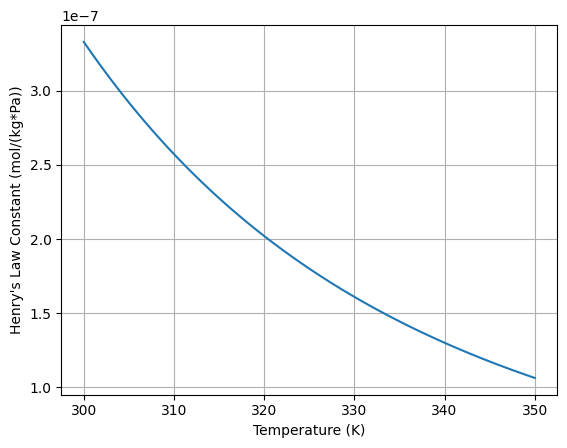

In [52]:
#plot Henry's law constant as a function of temperature
T = np.linspace(300, 350, 100)
plt.plot(T, He(T))
plt.xlabel('Temperature (K)')
plt.ylabel("Henry's Law Constant (mol/(kg*Pa))")
plt.grid()
plt.show()

For 2 Liter pop bottle that is 90% full of water and given a temperature rate of rise, what is the corresonding area for the PRV needed to keep the pressure below that allowed by ASME?

In [53]:
#relief valve set pressure
P_set_psig = 67 
P_set = P_set_psig * 6894.76 + 101325  # convert psig to Pa_abs

Control volume is the volume of the gas.
dn/dt = dnL/dt - flow.out where the dnL/dt is from the dissolution of the CO2 in the liquid and dnG/dt is from the gases leaving the control volume through the vent.

nL = $P\cdot He\cdot M_L$ where ML is the mass of the liquid in kg.

We will assume that the gas is ideal and that the temperature is increased linearly and that there is immediate equilibrium of temperature between the gas and the liquid (bad assumption but it will do for an estimate). 

In [54]:
#data for CO2
Patm = 101325 # atmospheric pressure in Pa
Rg = 8.314 #J/mol/K
gamma = 1.3 #specific heat ratio for CO2
totalvol = 2 #L 
V_gas = 0.1*totalvol/1000 #L to m3
M_liq = 0.9*totalvol/1000*1000 #kg of water
Mw_h2o = 0.018015 #kg/mol
Pinit = 60*6894.76 + 101325  # convert psig to Pa_abs; working pressure
Tinit = 298 # degrees K
n_gas_init = Pinit*V_gas / (Rg * Tinit)  # moles of gas
Cd_gas = 0.9
MwCO2 = 0.04401  # kg/mol for CO2
CvpL = 75  # J/mol/K
CvG = 28.46  # J/mol/K of CO2
CpG = 37.11  # J/mol/K of CO2
Tstd = 298 # K
Area = np.pi*0.12*0.33/2 #1/2 the surface area of a 2L bottle
Area_G = 0.1*Area #fraction of area exposed to gas from heat flux
Area_L = 0.9*Area #fraction of area exposed to liquid from heat flux
eps = 0.0025 #adsorptivity of the gas (estimate)
qH = 40000 #W/m2 heat flux into the system

In [55]:
def nout(Pg, T, ventarea):
    Ma = min(1,np.sqrt(2/(gamma -1)*((Pg/Patm)**((gamma-1)/gamma)-1)))
    n_out = Cd_gas*ventarea*Pg*np.sqrt(gamma/(Rg*T*MwCO2))*(1+(gamma-1)/2)**((gamma+1)/(2-2*gamma))
    return n_out

teventstart = 1e9 #time venting starts
dt = 0.00625 #time step for the simulation
flag = 0
multiplier = 0

def eq(vars,args): #solve the system of equations to determine the derivatives given the arguments
    global flag, teventstart, dt
    lam = 0.3 #steepness of the tanh function for venting
    nG, Pg, nLc, TL, TG, t = args[0]; ventarea = args[1]
    dnGdt, dPdt, dnLcdt, dTGdt, dTLdt, dtdt = vars
    if Pg > P_set and flag == 0:
        teventstart = t
        flag = 1
        #print(f"Venting started at time {t:.2f} seconds")
    if Pg <= P_set*0.98 and flag == 1:
        flag = 0 #reset the flag
        #print(f"Venting stopped at time {t:.2f} seconds")
    multiplier = np.tanh(lam*(t - teventstart))*flag
    eq1 = -dnLcdt - nout(Pg,TG,ventarea)*multiplier - dnGdt
    eq2 = dnGdt*Rg*TG/V_gas + nG*Rg/V_gas*dTGdt - dPdt
    eq3 = dPdt*He(TL)*M_liq + Pg*dHedt(TL, dTLdt)*M_liq - dnLcdt #moles per second of CO2 going out of the liquid
    eq4 = (qH*Area_G*eps - multiplier*nout(Pg,TG,ventarea)*CpG*(TG - Tstd) + dnLcdt*CpG*(TL - Tstd))/(nG*CvG) - dTGdt
    eq5 = (qH*Area_L - dnLcdt*CvG*(TL - Tstd))/(M_liq/Mw_h2o*CvpL) - dTLdt
    eq6 = 1 - dtdt #time tracking

    return [eq1, eq2, eq3, eq4, eq5, eq6]    

In [56]:
#initial conditions
nG0 = n_gas_init
P0 = Pinit
nLc0 = P0*He(Tinit)*M_liq #initial moles of CO2 in the liquid
TG0 = Tinit
TL0 = Tinit
y0 = [nG0, P0, nLc0, TG0, TL0, 0]

In [57]:
#solve the system of equations over time
def derivatives(y,ventarea):
    return fsolve(eq, (0, 0, 0, 0, 0, dt), args=[y,ventarea])

In [58]:
#Euler integration
totaltime = 100; steps = int(totaltime/dt)
ventarea = np.pi * (0.0254/2)**2*np.array([0,(1/64)**2,(1/32)**2])  # area in m^2 for an inch vent
results = np.zeros((len(ventarea),steps, len(y0)))
results[:, 0, :] = y0
for va in range(len(ventarea)):
    for i in range(1, steps):
        dydt = derivatives(results[va, i - 1], ventarea[va])
        results[va, i] = results[va, i - 1] + np.array(dydt) * dt

/Users/clintguymon/opt/anaconda3/envs/jupiterbook/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [59]:
##integrate with solve_ivp instead of euler
#def model(t, y, ventarea):
#    return fsolve(eq, (0, 0, 0, 0, 0, dt), args=[y, ventarea])
#sol = solve_ivp(model, [0, totaltime], y0, args=(ventarea[1],), t_eval=np.linspace(0, totaltime, steps))

In [60]:
#add results to a dataframe
df0 = pd.DataFrame(results[0], columns=['moles of gas', 'pressure, Pa', 'dissolved moles of gas', 'gas temperature, K', 'liquid temperature, K', 'time, sec'])
df0['pressure, psig'] = df0['pressure, Pa']/6894.76 - 14.7
df1 = pd.DataFrame(results[1], columns=['moles of gas', 'pressure, Pa', 'dissolved moles of gas', 'gas temperature, K', 'liquid temperature, K', 'time, sec'])
df1['pressure, psig'] = df1['pressure, Pa']/6894.76 - 14.7
df2 = pd.DataFrame(results[2], columns=['moles of gas', 'pressure, Pa', 'dissolved moles of gas', 'gas temperature, K', 'liquid temperature, K', 'time, sec'])
df2['pressure, psig'] = df2['pressure, Pa']/6894.76 - 14.7

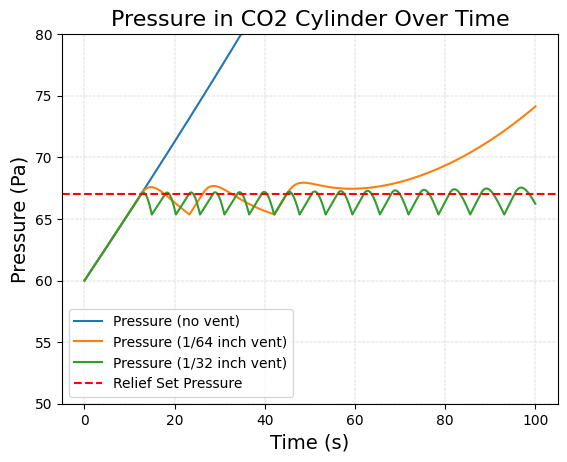

In [61]:
# Plot pressure
sns.lineplot(x='time, sec', y='pressure, psig', data=df0, label='Pressure (no vent)')
sns.lineplot(x='time, sec', y='pressure, psig', data=df1, label='Pressure (1/64 inch vent)')
sns.lineplot(x='time, sec', y='pressure, psig', data=df2, label='Pressure (1/32 inch vent)')
plt.axhline(y=P_set_psig, color='red', linestyle='--', label='Relief Set Pressure')
plt.title('Pressure in CO2 Cylinder Over Time', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Pressure (Pa)', fontsize=14)
plt.ylim([50, 80])
plt.legend()
plt.grid(linestyle='-.', linewidth=0.3)

In [62]:
max(df0['pressure, psig']), max(df1['pressure, psig']), max(df2['pressure, psig'])

(124.1988599716381, 74.12565331620597, 67.54166824860349)

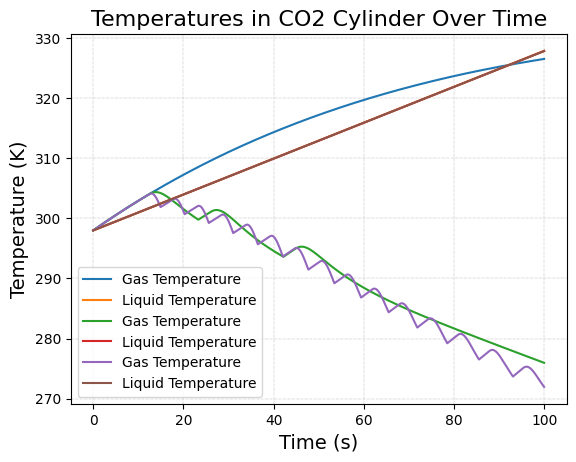

In [63]:
#plot the temperatures
sns.lineplot(x='time, sec', y='gas temperature, K', data=df0, label='Gas Temperature')
sns.lineplot(x='time, sec', y='liquid temperature, K', data=df0, label='Liquid Temperature')
sns.lineplot(x='time, sec', y='gas temperature, K', data=df1, label='Gas Temperature')
sns.lineplot(x='time, sec', y='liquid temperature, K', data=df1, label='Liquid Temperature')
sns.lineplot(x='time, sec', y='gas temperature, K', data=df2, label='Gas Temperature')
sns.lineplot(x='time, sec', y='liquid temperature, K', data=df2, label='Liquid Temperature')
plt.title('Temperatures in CO2 Cylinder Over Time', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Temperature (K)', fontsize=14)
plt.legend()
plt.grid(linestyle='-.', linewidth=0.3) 

<Axes: xlabel='time, sec', ylabel='moles of gas'>

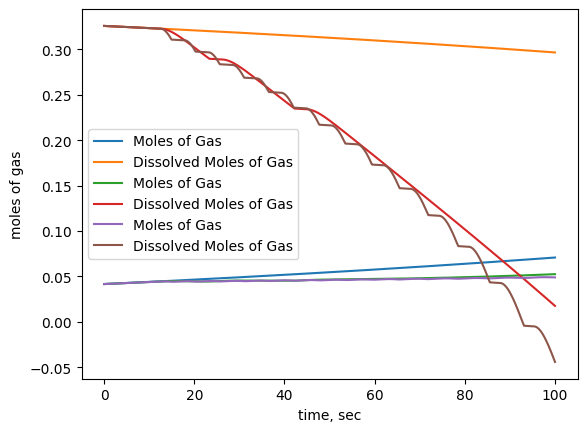

In [64]:
#plot the moles of gas and dissolved gas
sns.lineplot(x='time, sec', y='moles of gas', data=df0, label='Moles of Gas')
sns.lineplot(x='time, sec', y='dissolved moles of gas', data=df0, label='Dissolved Moles of Gas')
sns.lineplot(x='time, sec', y='moles of gas', data=df1, label='Moles of Gas')
sns.lineplot(x='time, sec', y='dissolved moles of gas', data=df1, label='Dissolved Moles of Gas')
sns.lineplot(x='time, sec', y='moles of gas', data=df2, label='Moles of Gas')
sns.lineplot(x='time, sec', y='dissolved moles of gas', data=df2, label='Dissolved Moles of Gas')

In [65]:
df1['nout'] = df1.apply(lambda row: nout(row['pressure, Pa'], row['gas temperature, K'], ventarea[1]), axis=1)

<Axes: xlabel='time, sec', ylabel='nout'>

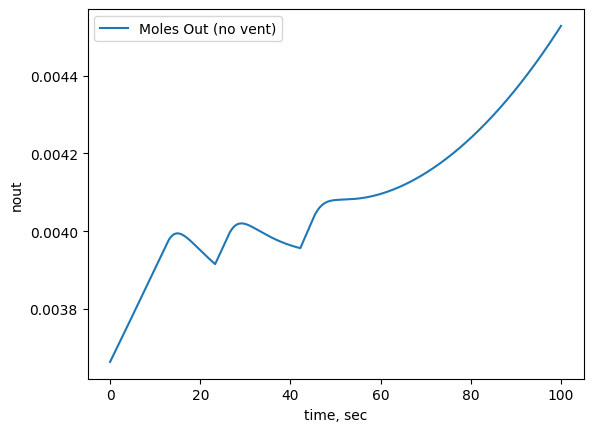

In [66]:
#plot nout
sns.lineplot(x='time, sec', y='nout', data=df1, label='Moles Out (no vent)')

In [67]:
df2['P'] = df2.apply(lambda row: row['moles of gas']*Rg*row['gas temperature, K']/V_gas, axis=1)
df1['P'] = df1.apply(lambda row: row['moles of gas']*Rg*row['gas temperature, K']/V_gas, axis=1)

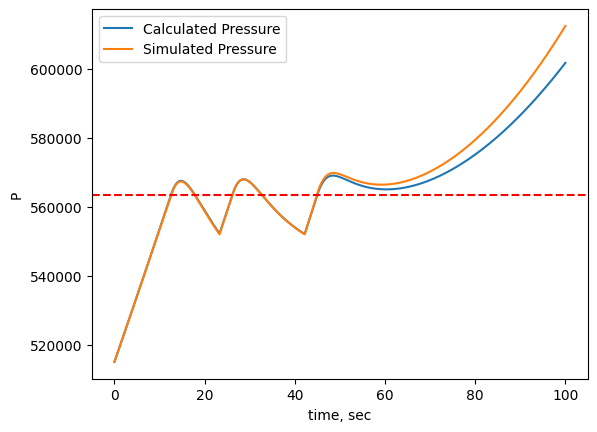

In [68]:
#plot 'P' versus 'pressure, Pa' to verify the calculation
sns.lineplot(x='time, sec', y='P', data=df1, label='Calculated Pressure')
sns.lineplot(x='time, sec', y='pressure, Pa', data=df1, label='Simulated Pressure')
#sns.lineplot(x='time, sec', y='pressure, Pa', data=dfsol, label='sol')
plt.axhline(y=P_set, color='red', linestyle='--', label='Relief Set Pressure')

In [69]:
difference = df2['pressure, Pa'] - df2['P']
max(difference), min(difference)

(5473.397840608377, -206.28211669775192)

In [70]:
#calculation with the above example for a 2L bottle of soda with disolved CO2 with the 1st solution estimate
#the above solution estimate is the more in detailed one that is referred to as solution estimate 2 in the text

In [71]:
#vapor pressure parameter for water with the august equation
Ahere = 20.386+4.89; Bhere = 5132; Pwatsat = lambda Tt: np.exp(Ahere - Bhere/Tt) #vapor pressure in Pa
There = 60+273; dTheredt = qH*Area_L/(M_liq/Mw_h2o*CvpL) #rate of change of temperature in K/s
nG = P_set*V_gas/(Rg*There) # moles in the gas phase
nGw = Pwatsat(There)*V_gas/(Rg*There) #moles of water vapor in the gas phase
PCO2 = P_set - Pwatsat(There) #partial pressure of CO2 in the gas phase
dHedt = He(There)*2400/(There**2)*dTheredt 
ndotvap = nGw*(-1/There*dTheredt + Bhere/(There**2)*dTheredt) #moles of water vaporizing per second
ndotdis = (PCO2*M_liq*dHedt+P_set/There*dTheredt*M_liq*He(There))/(1+P_set*M_liq*He(There)/nG)

In [72]:
Ahere

25.276

In [73]:
ndotvap, ndotdis #mol/s

(1.7971837242722628e-05, 0.0002295720714516911)

In [74]:
#solve for the volume of venting required to keep the pressure below the set pressure with nout equation
def find_vent_area(nout_target, Pg, T):
    def func(ventarea):
        return nout(Pg, T, ventarea) - nout_target
    ventarea_guess = 1e-6  # initial guess for vent area in m^2
    ventarea_solution = fsolve(func, ventarea_guess)
    return ventarea_solution[0]

In [75]:
ventareagas = find_vent_area(ndotdis+ndotvap, P_set, There)
diametergas =  np.sqrt(4*ventareagas / np.pi) /0.0254  # convert m to inches

In [76]:
ventareagas, diametergas*64

(8.077859233639112e-09, 0.25553444943676396)

In [77]:
#venting a liquid instead of a gas
#we'd need to vent the volume of liquid that contains the moles of CO2 that need to be vented
Volgas_nn = (ndotdis+ndotvap)*Rg*There/P_set #m3/s
nflowliqhere = Volgas_nn*1000/0.018015 #mol/s
nflowliqhere

0.06753868302080293

In [78]:
Arealiq = nflowliqhere/(0.65*np.sqrt(2*(P_set - Patm)/(0.018/1000*0.018))) #m^2
diameterliq =  np.sqrt(4*Arealiq / np.pi)/0.0254  #m to inches
diameterliq*64, Arealiq

(0.7052631570155131, 6.153181992288495e-08)

### Inerting

In [79]:
np.ceil(np.log(0.03/1)/np.log(15/101))

2.0

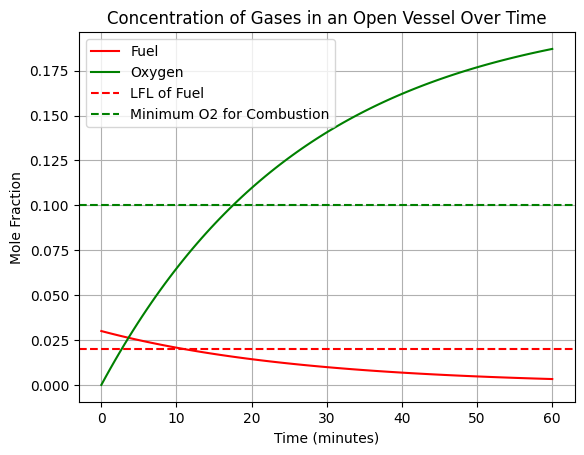

In [80]:
# mass balance to give the concentration of oxygen, fuel, and nitrogen as a function of time inside an open vessel

def derivIn(y,t, nair, ntot):
    yO2, yN2, yF = y
    dyO2dt = (0.21 - yO2)*nair/ntot
    dyN2dt = (0.79 - yN2)*nair/ntot
    dyFdt = -yF*nair/ntot
    return [dyO2dt, dyN2dt, dyFdt]

#initial conditions
y0 = [0, 0.97, 0.03] #
nair = 0.5 #moles of air entering per second
ntot = 20000/1000 * 101325/(8.314*300) #total moles in the vessel #20000L at 1 atm and 300K
t = np.linspace(0, 3600, 100) #time in seconds
sol = odeint(derivIn, y0, t, args=(nair, ntot))
yO2 = sol[:, 0]; yN2 = sol[:, 1]; yF = sol[:, 2]

#plot the results
#plt.plot(t/60, yN2, label='Nitrogen')
plt.plot(t/60, yF, color='r', label='Fuel')
plt.plot(t/60, yO2, color='g', label='Oxygen')
#add a horizontal line at 0.16 for the LFL of fuel
plt.axhline(y=0.02, color='r', linestyle='--', label='LFL of Fuel')
#add a horizontal line for the minimum oxygen concentration for combustion at 0.16
plt.axhline(y=0.10, color='g', linestyle='--', label='Minimum O2 for Combustion')
plt.xlabel('Time (minutes)')
plt.ylabel('Mole Fraction')
plt.title('Concentration of Gases in an Open Vessel Over Time')
plt.legend()
plt.grid()
plt.show()

In [81]:
#drop height calculation
denergy = 2*0.20*9.81 #20 cm drop of 2 kg mass
impactarea = np.pi*1**2/4 #1 cm diameter

In [82]:
denergy,impactarea, denergy/impactarea

(3.9240000000000004, 0.7853981633974483, 4.996191973540779)

## Chapter 12

### Climate plot of temperature and CO2 concentration

In [107]:
#import data for temperature and CO2 concentration by year. This data is from ourworldindata.org
df = pd.read_csv('tempsVSCO2ppm.csv')
#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#drop rows with NaN values
df = df.dropna()
df.head()

,Entity,Year,Global average temperature anomaly relative to 1861-1890,Rolling yearly average of the concentration of atmospheric carbon dioxide
0,World,1979.0,0.453156,336.85333
1,World,1980.0,0.558370,338.91333
2,World,1981.0,0.612310,340.11166
3,World,1982.0,0.396566,340.85583
4,World,1983.0,0.586108,342.53000


In [108]:
df.columns

Index(['Entity', 'Year',
       'Global average temperature anomaly relative to 1861-1890',
       'Rolling yearly average of the concentration of atmospheric carbon dioxide'],
      dtype='object')

Slope of temperature increase per ppm CO2: 0.01113 C/ppm


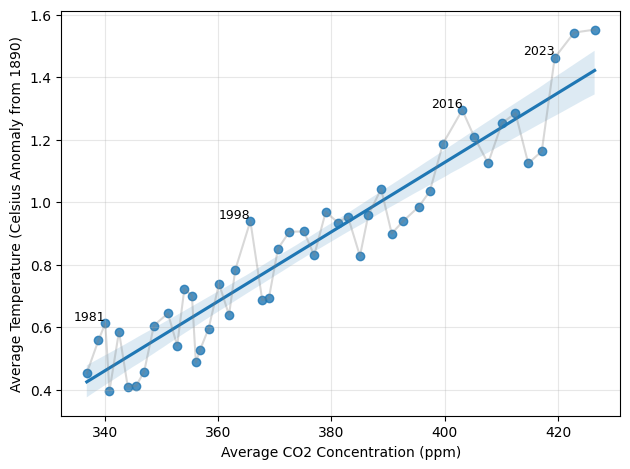

In [ ]:
# use seaborn to plot the data with a regression line 
sns.regplot(x='Rolling yearly average of the concentration of atmospheric carbon dioxide', y='Global average temperature anomaly relative to 1861-1890', data=df)
#connect points with a faint dotted line
plt.plot(df['Rolling yearly average of the concentration of atmospheric carbon dioxide'], df['Global average temperature anomaly relative to 1861-1890'], color='gray', alpha=0.3)
plt.ylabel('Average Temperature (Celsius Anomaly from 1890)')
plt.xlabel('Average CO2 Concentration (ppm)')
#add a label to 3 points indicating the years 1950, 2000, and 2020
for year in [1981, 1998, 2016, 2023]:
    row = df[df['Year'] == year]
    if not row.empty:
        x = row['Rolling yearly average of the concentration of atmospheric carbon dioxide'].values[0]
        y = row['Global average temperature anomaly relative to 1861-1890'].values[0]
        plt.text(x, y, str(year), fontsize=9, verticalalignment='bottom', horizontalalignment='right')

#print out slope of the line from regplot
#parames = stats.linregress(df['Rolling yearly average of the concentration of atmospheric carbon dioxide'], df['Global average temperature anomaly relative to 1861-1890'])

slope, intercept = np.polyfit(df['Rolling yearly average of the concentration of atmospheric carbon dioxide'], df['Global average temperature anomaly relative to 1861-1890'], 1)
print(f"Slope of temperature increase per ppm CO2: {slope:.5f} C/ppm")

#plt.title('Global Temperature Anomaly vs CO2 Concentration')
plt.grid(alpha=0.3)
#save the plot
#plt.tight_layout()
#plt.savefig('Temp_vs_CO2.png', dpi=300)


plt.show()

In [110]:
parames

LinregressResult(slope=0.011130315503952827, intercept=-3.32408667677064, rvalue=0.9489064608468457, pvalue=3.5744870502629965e-24, stderr=0.0005517677405273695, intercept_stderr=0.2079261987213731)